In [4]:
import pandas as pd

df = pd.read_csv('./src/Mall_Customers.csv')

df.head(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:
df = df.rename(columns={
    'Gender': 'gender', 
    'Age': 'age', 
    'Annual Income (k$)': 'annual_income', 
    'Spending Score (1-100)': 'spending_score'
})

df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [12]:
from sklearn.cluster import KMeans


X = df.drop(['CustomerID', 'gender'], axis=1)

clusters = []
for i in range (1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

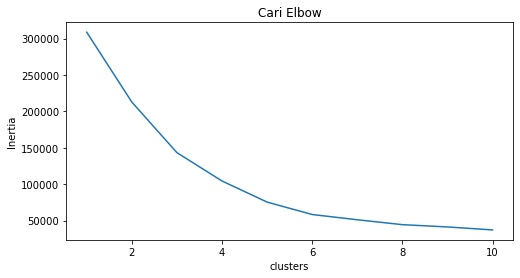

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('Inertia')

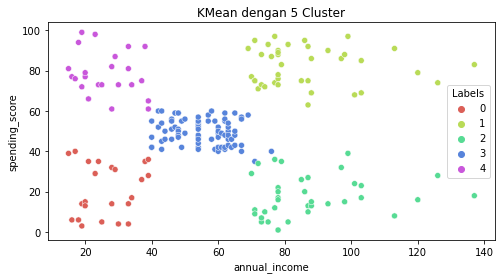

In [15]:
km5 = KMeans(n_clusters=5).fit(X)


X['Labels'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMean dengan 5 Cluster')
plt.show()
